In [1]:
from lightkurve import TessLightCurve
from lightkurve.search import open 
from lightkurve.correctors import RegressionCorrector
import lightkurve as lk
import numpy as np

In [2]:
def findOrbitRadius(periodInDays, M):
    G = 6.67408 * (10 ** (-11))
    pi = 3.141592653589
    sunMassKG = 1.989 * (10**30)
    massKG = M * sunMassKG
    periodInSec = periodInDays * 24 * 3600
    return ((periodInSec * periodInSec*G*massKG)/4*pi*pi) ** (1. / 3)
def metersToAU(d):
    return d/(1.495978707*(10**11))

In [3]:
#pixels = open("TIC165602000/tess2019226182529-s0015-0000000165602000-0151-s_tp.fits")
#pixels.interact()
#lc.query_solar_system_objects()

In [156]:
lcRAW = open("TIC 144253818/tess2020212050318-s0028-0000000144253818-0190-s_lc.fits").PDCSAP_FLUX

In [157]:
win_length = int(0.10 * len(lcRAW.flux))
if win_length % 2 == 0:
    win_length += 1
print("win_length", win_length)
lc = lcRAW.remove_outliers(sigma=20, sigma_upper=4).remove_nans().normalize().flatten(win_length)

win_length 1729


TIC 144253818 : Folding on period  0.37800000000000006


<AxesSubplot:xlabel='Phase', ylabel='Normalized Flux'>

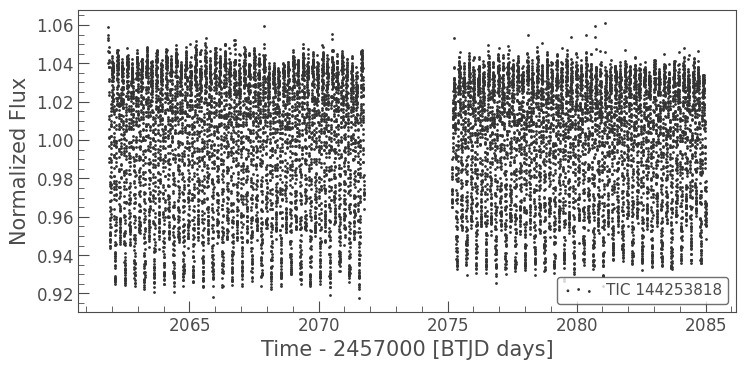

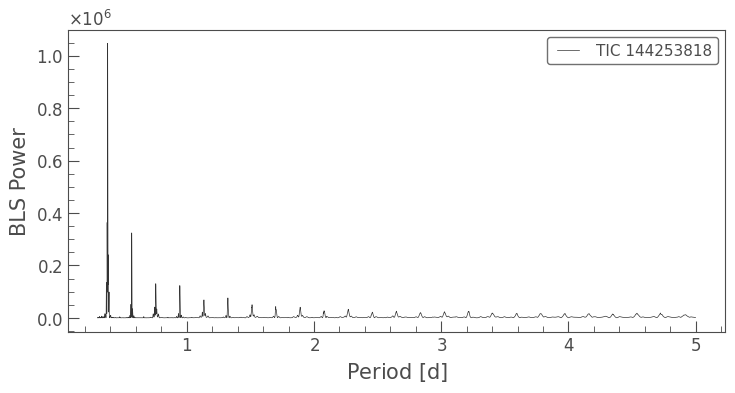

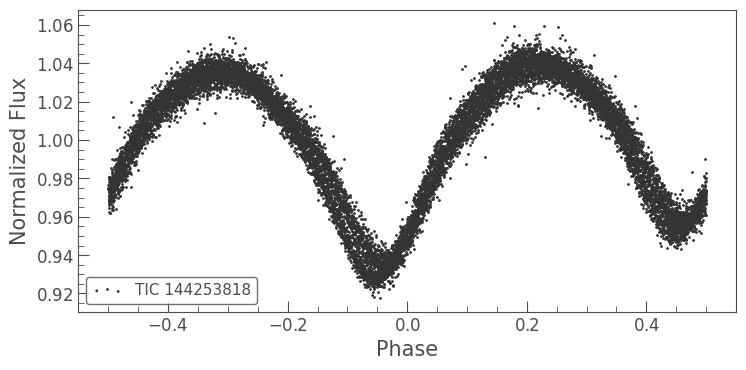

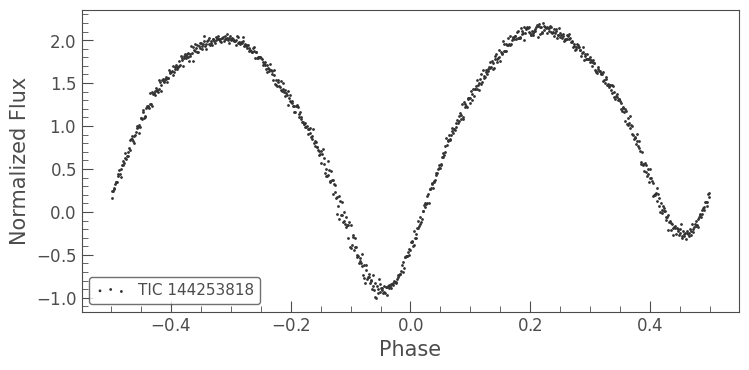

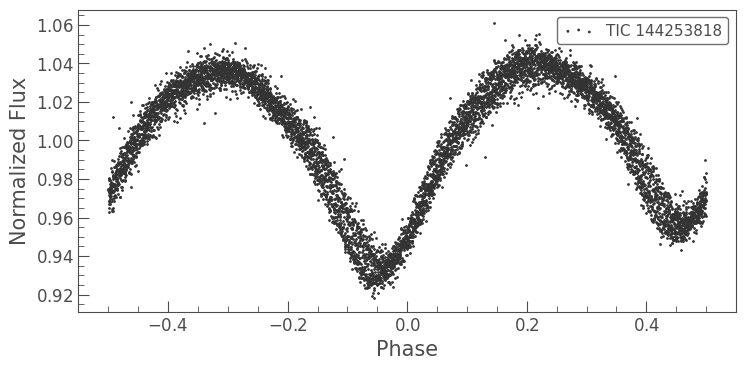

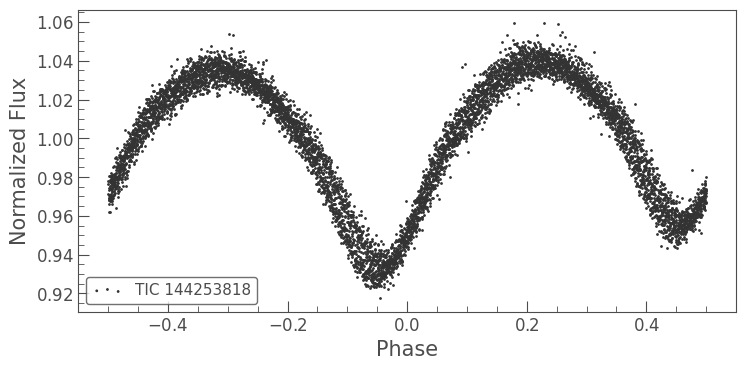

In [169]:
pg = lc.to_periodogram(method="bls", period=np.arange(0.3, 5, 0.001))
lc_fold = lc.fold(period=pg.period_at_max_power, t0=0.15)
lc_global = lc_fold.bin(bins=int(win_length/2), method='median') - 1
lc_global = (lc_global / np.abs(lc_global.flux.min()) ) * 2.0 + 1

lc.scatter()
pg.plot();
print(lc.label, ": Folding on period ",lc_fold.period)
lc_fold.scatter()
lc_global.scatter()
# Use to confirm that it is not an eclipsing binary
lc_fold[lc_fold.odd_mask].scatter()  
lc_fold[lc_fold.even_mask].scatter()  